In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(65)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | sao joao da barra
Processing Record 3 of Set 1 | cairns
Processing Record 4 of Set 1 | bambous virieux
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 1 | orillia
Processing Record 10 of Set 1 | chippenham
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | sao filipe
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | auki
Processing Record 15 of Set 1 | clyde river
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | honiara
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | sitka
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of Set 1 | keti bandar
Pro

Processing Record 38 of Set 4 | wuda
Processing Record 39 of Set 4 | seymchan
Processing Record 40 of Set 4 | jau
Processing Record 41 of Set 4 | krompachy
Processing Record 42 of Set 4 | iskateley
Processing Record 43 of Set 4 | sumbawa
City not found. Skipping...
Processing Record 44 of Set 4 | ponta do sol
Processing Record 45 of Set 4 | laramie
Processing Record 46 of Set 4 | anadyr
Processing Record 47 of Set 4 | tuggurt
City not found. Skipping...
Processing Record 48 of Set 4 | samarai
Processing Record 49 of Set 4 | moen
Processing Record 50 of Set 4 | lorengau
Processing Record 1 of Set 5 | pueblo
Processing Record 2 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 5 | marsa matruh
Processing Record 4 of Set 5 | abnub
Processing Record 5 of Set 5 | itaberai
Processing Record 6 of Set 5 | sorland
Processing Record 7 of Set 5 | mamallapuram
Processing Record 8 of Set 5 | margate
Processing Record 9 of Set 5 | vardo
Processing Record 10 of Set 5 | mal

Processing Record 33 of Set 8 | riyadh
Processing Record 34 of Set 8 | copiapo
Processing Record 35 of Set 8 | mogadishu
Processing Record 36 of Set 8 | ternate
Processing Record 37 of Set 8 | chimbote
Processing Record 38 of Set 8 | dezhou
Processing Record 39 of Set 8 | voznesenskoye
Processing Record 40 of Set 8 | lompoc
Processing Record 41 of Set 8 | pontianak
Processing Record 42 of Set 8 | aberchirder
Processing Record 43 of Set 8 | san martin
Processing Record 44 of Set 8 | nizhniy tsasuchey
Processing Record 45 of Set 8 | skjervoy
Processing Record 46 of Set 8 | tabuk
Processing Record 47 of Set 8 | mayya
Processing Record 48 of Set 8 | barranca
Processing Record 49 of Set 8 | butterworth
Processing Record 50 of Set 8 | wharton
Processing Record 1 of Set 9 | bozuyuk
Processing Record 2 of Set 9 | gumdag
Processing Record 3 of Set 9 | montrose
Processing Record 4 of Set 9 | ponta delgada
Processing Record 5 of Set 9 | shuangyang
Processing Record 6 of Set 9 | hami
Processing Re

Processing Record 19 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 20 of Set 12 | green river
Processing Record 21 of Set 12 | taltal
Processing Record 22 of Set 12 | orcopampa
Processing Record 23 of Set 12 | sola
Processing Record 24 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 25 of Set 12 | kindu
Processing Record 26 of Set 12 | ola
Processing Record 27 of Set 12 | megion
Processing Record 28 of Set 12 | huarmey
Processing Record 29 of Set 12 | inyonga
Processing Record 30 of Set 12 | shizunai
Processing Record 31 of Set 12 | port augusta
Processing Record 32 of Set 12 | borgo san lorenzo
Processing Record 33 of Set 12 | kuche
City not found. Skipping...
Processing Record 34 of Set 12 | kudahuvadhoo
Processing Record 35 of Set 12 | lata
Processing Record 36 of Set 12 | pazardzik
City not found. Skipping...
Processing Record 37 of Set 12 | phalaborwa
Processing Record 38 of Set 12 | teahupoo
Processing Record 39 of Set 12 | loksa
Proces

In [12]:
len(city_data)

566

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,19.56,70,100,4.23,GL,2022-02-13 14:49:13
1,Sao Joao Da Barra,-21.6403,-41.0511,82.49,77,54,5.06,BR,2022-02-13 14:45:37
2,Cairns,-16.9167,145.7667,76.95,78,100,10.36,AU,2022-02-13 14:48:52
3,Bambous Virieux,-20.3428,57.7575,82.65,78,40,6.91,MU,2022-02-13 14:49:25
4,Saint-Philippe,-21.3585,55.7679,81.99,86,56,8.93,RE,2022-02-13 14:49:26
5,Yellowknife,62.4560,-114.3525,-24.59,75,40,3.44,CA,2022-02-13 14:49:26
6,Severo-Kurilsk,50.6789,156.1250,21.58,72,25,8.88,RU,2022-02-13 14:49:26
7,Orillia,44.6087,-79.4207,1.33,76,48,6.91,CA,2022-02-13 14:48:00
8,Chippenham,51.4600,-2.1247,51.33,93,100,26.26,GB,2022-02-13 14:49:27
9,Rikitea,-23.1203,-134.9692,78.37,70,6,11.59,PF,2022-02-13 14:49:27


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2022-02-13 14:49:13,65.6145,-37.6368,19.56,70,100,4.23
1,Sao Joao Da Barra,BR,2022-02-13 14:45:37,-21.6403,-41.0511,82.49,77,54,5.06
2,Cairns,AU,2022-02-13 14:48:52,-16.9167,145.7667,76.95,78,100,10.36
3,Bambous Virieux,MU,2022-02-13 14:49:25,-20.3428,57.7575,82.65,78,40,6.91
4,Saint-Philippe,RE,2022-02-13 14:49:26,-21.3585,55.7679,81.99,86,56,8.93
5,Yellowknife,CA,2022-02-13 14:49:26,62.4560,-114.3525,-24.59,75,40,3.44
6,Severo-Kurilsk,RU,2022-02-13 14:49:26,50.6789,156.1250,21.58,72,25,8.88
7,Orillia,CA,2022-02-13 14:48:00,44.6087,-79.4207,1.33,76,48,6.91
8,Chippenham,GB,2022-02-13 14:49:27,51.4600,-2.1247,51.33,93,100,26.26
9,Rikitea,PF,2022-02-13 14:49:27,-23.1203,-134.9692,78.37,70,6,11.59


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644778711.4881237

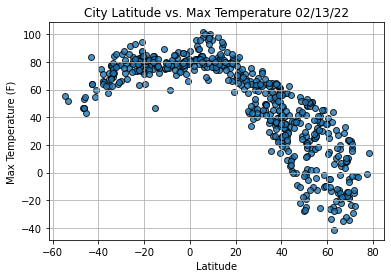

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

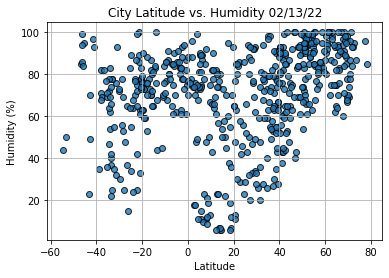

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

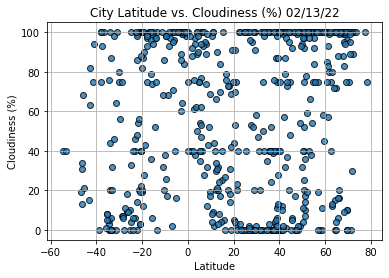

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

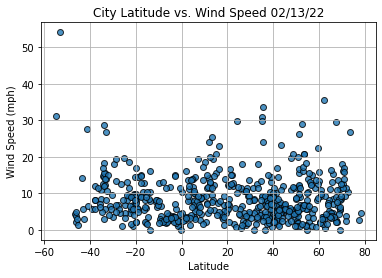

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

In [25]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

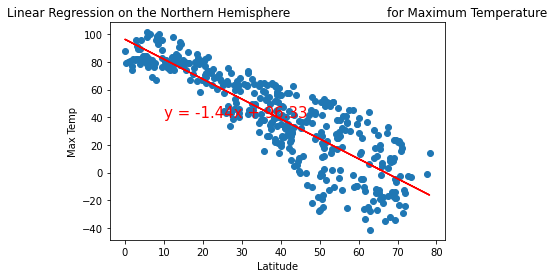

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

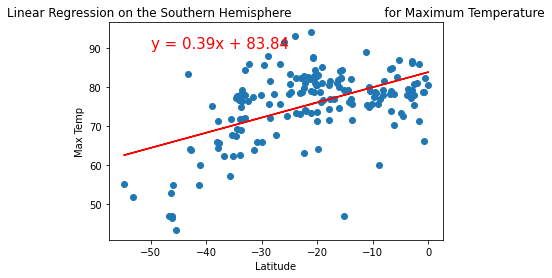

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

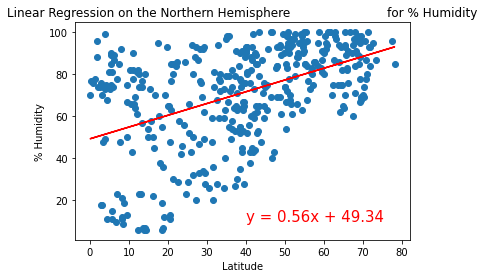

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

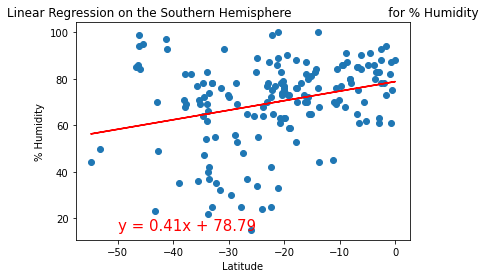

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

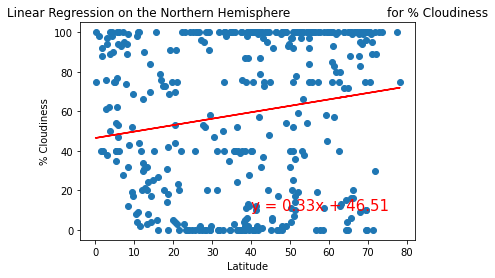

In [42]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

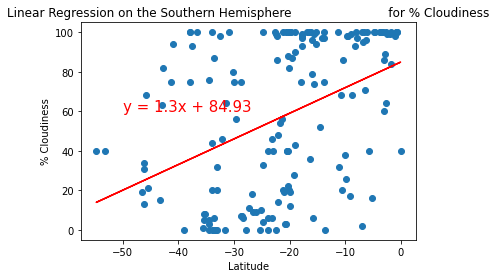

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

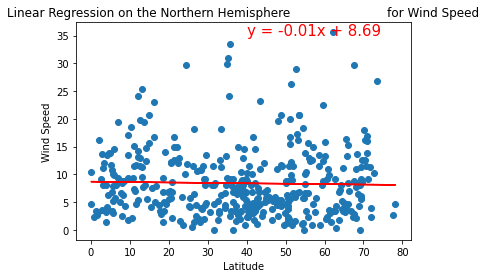

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

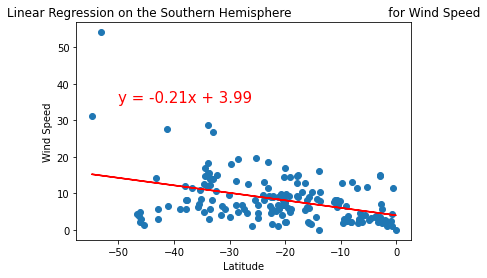

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))